In [23]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert5/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert5/train/pred_train')
#x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert5/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert5/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert5/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert5/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert5/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert5/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert5/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert6/valid/video_valid_path')\n"

In [28]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(36, 288, 36, 288, 36, 36)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [29]:
len(x_audio_train_prediction),len(x_train_prediction)

(288, 288)

In [30]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [31]:
len(df_train)

288

In [32]:
df_train

,labels
0,0
1,0
2,1
3,0
4,0
...,...
283,2
284,1
285,0
286,3


In [33]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [34]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000017,0.989271,0.000152,0.002029,0.008531,1.311795e-05,2.767378e-02,1.451972e-03,4.510778e-03,9.663503e-01
1,0.000473,0.000247,0.766067,0.001387,0.231826,9.510927e-03,2.213566e-04,9.902220e-01,3.976591e-08,4.583941e-05
2,0.000900,0.000038,0.988382,0.005561,0.005119,8.700351e-04,2.358016e-06,9.991240e-01,2.397215e-06,1.205876e-06
3,0.000758,0.000034,0.987649,0.002581,0.008978,9.601275e-11,1.050039e-08,9.750736e-01,5.661137e-08,2.492639e-02
4,0.000027,0.001359,0.003066,0.000016,0.995532,9.216656e-07,8.401257e-10,1.428202e-02,4.187376e-06,9.857129e-01
5,0.998480,0.000010,0.000915,0.000554,0.000041,9.998312e-01,1.407505e-08,1.686357e-04,1.271419e-07,3.263918e-09
6,0.997289,0.000015,0.001517,0.001103,0.000076,9.998780e-01,2.962125e-08,1.072036e-04,1.449578e-05,1.916524e-07
7,0.000037,0.970336,0.000261,0.003231,0.026135,1.409613e-06,9.981740e-01,1.493374e-05,1.804629e-03,5.024888e-06
8,0.997372,0.000017,0.001394,0.001147,0.000070,9.999001e-01,5.382641e-11,9.384631e-05,3.513849e-06,2.560398e-06
9,0.000668,0.000037,0.985303,0.002643,0.011349,1.005697e-05,1.457924e-05,9.990613e-01,5.959568e-04,3.181632e-04


In [35]:
len(x_test),len(x_train)

(36, 288)

In [36]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.997460,0.000016,0.001347,0.001108,0.000068,9.998494e-01,1.862673e-13,1.505673e-04,5.831596e-11,6.703266e-09
1,0.997616,0.000015,0.001322,0.000981,0.000067,9.985620e-01,3.734493e-09,1.400092e-03,3.781355e-05,1.715376e-07
2,0.000028,0.990608,0.000132,0.001077,0.008155,1.209036e-07,9.993974e-01,9.797673e-07,2.602427e-04,3.412519e-04
3,0.998147,0.000009,0.001189,0.000609,0.000047,9.953516e-01,4.431135e-07,4.501225e-03,1.461861e-04,6.468042e-07
4,0.996890,0.000018,0.001803,0.001211,0.000078,9.965588e-01,6.618246e-05,3.089135e-03,4.033483e-05,2.454254e-04
...,...,...,...,...,...,...,...,...,...,...
283,0.000659,0.000032,0.990061,0.003755,0.005493,3.351411e-10,4.307414e-09,9.996814e-01,2.802059e-07,3.184685e-04
284,0.000011,0.996896,0.000051,0.000887,0.002155,1.652530e-06,9.356118e-01,3.445741e-06,3.279888e-02,3.158410e-02
285,0.997334,0.000016,0.001561,0.001016,0.000073,9.832575e-01,3.148723e-08,1.625087e-02,1.191593e-06,4.904323e-04
286,0.000212,0.000322,0.001545,0.997848,0.000073,4.650293e-09,1.456757e-06,7.931724e-07,9.999379e-01,5.988339e-05


In [37]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [38]:
len(new_y_train)

288

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [41]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(288,)
y_train, y_train.shape

(array([0, 0, 1, 0, 0, 2, 1, 4, 0, 4, 1, 2, 4, 0, 4, 1, 3, 3, 0, 3, 4, 1,
        3, 3, 0, 0, 4, 1, 2, 3, 4, 0, 0, 1, 3, 4, 1, 3, 2, 3, 3, 0, 4, 0,
        4, 1, 2, 0, 4, 0, 0, 2, 2, 0, 4, 0, 0, 1, 3, 2, 4, 2, 1, 1, 2, 1,
        3, 3, 4, 3, 0, 2, 2, 0, 0, 0, 0, 1, 4, 0, 3, 3, 0, 0, 0, 2, 4, 3,
        0, 1, 2, 3, 0, 4, 0, 2, 1, 1, 2, 4, 4, 1, 3, 4, 4, 2, 2, 2, 1, 0,
        0, 4, 3, 0, 0, 3, 3, 3, 4, 0, 0, 1, 4, 1, 1, 2, 3, 1, 1, 1, 3, 2,
        2, 0, 4, 1, 1, 0, 0, 4, 2, 1, 2, 2, 4, 4, 4, 2, 0, 4, 0, 1, 0, 0,
        3, 3, 3, 3, 0, 2, 2, 4, 0, 3, 3, 3, 0, 0, 0, 0, 1, 3, 0, 0, 0, 3,
        3, 0, 4, 2, 4, 1, 1, 2, 4, 0, 0, 0, 0, 0, 4, 1, 0, 3, 0, 4, 2, 3,
        1, 0, 4, 0, 0, 0, 0, 0, 1, 3, 4, 0, 0, 1, 2, 0, 3, 2, 0, 0, 0, 1,
        2, 2, 2, 0, 1, 2, 4, 2, 3, 1, 0, 1, 1, 0, 1, 0, 4, 0, 1, 0, 0, 2,
        2, 0, 1, 4, 4, 0, 0, 0, 3, 0, 0, 4, 0, 2, 1, 0, 4, 4, 2, 0, 1, 2,
        4, 4, 0, 2, 0, 3, 3, 3, 0, 0, 0, 3, 3, 2, 4, 4, 2, 3, 3, 2, 1, 0,
        3, 0]), (288,))

# training machine learning

In [42]:

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

clf = MLPClassifier(hidden_layer_sizes=(40,),random_state=42, max_iter=500).fit(new_x_train, new_y_train)
predictions = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [43]:
predictions

array([1, 2, 2, 2, 4, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 4, 4, 4, 0, 3, 4,
       3, 1, 3, 1, 2, 0, 0, 3, 3, 3, 0, 2, 2, 4])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       0.83      1.00      0.91         5

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.96        36
weighted avg       0.98      0.97      0.97        36

----accuracy score 97.22222222222221 ----


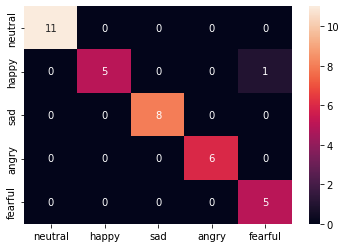

In [44]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [22]:
path='/content/drive/My Drive/fusion/savee_fusion_model/MLP/expert5'
savedvX = joblib.dump(clf, path)

print("MODEL SAVED")

MODEL SAVED
